# A look at the matter power spectrum
In this notebook we plot the matter power spectrum in the most general case: for the $\Lambda CDM$ model, with both the linear and non-linear spectrum in the same plot.
The goal of this plot is to give an insight in the matter power spectrum and showcase it's features. Note: the resulting plot is discussed in the notebook 'varying_P_k.ipynb'

In [1]:
# First of all, for good order, import all the necessary packacges, as suggested by the CCLX examples and common sense:

# The Core Cosmology Library:
import pyccl as ccl

# The conventional tools to deal with our results:
import numpy as np
import matplotlib.pyplot as plt

[2.0, 1.5, 1, 0.5, 0.0]


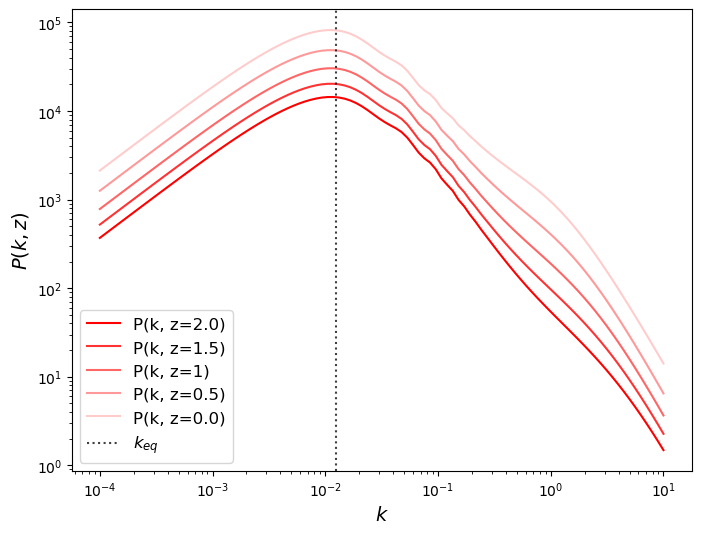

In [8]:
# To plot the matter power spectrum, we must define a cosmology first, based on the LCDM parameters

# To plot the spectrum against the wavenumber:
kmin, kmax, nk = 1e-4, 1e1, 100
k = np.geomspace(kmin, kmax, nk) # np.linspace(kmin, kmax, nk) # Try linspace ---> np.geomspace() or maybe np.logspace(); geomspace makes the curve smooth
z = [0., 0.5, 1, 1.5, 2.]
print(z[::-1])
a = [1/(1 + red) for red in z[::-1]]  # scale factor

# The standard values, in a dictionary:
pars = {r"Omega_c": 0.27, r"Omega_b": 0.045, r"h": 0.67, r"A_s": 2.1e-9, r"n_s": 0.96} # Here we have a reference list of the parameters. This will be altered slightly in the loop.

# For elegance in our plot:
keys = list(pars)
keys[0], keys[1], keys[3], keys[4] = r"$\Omega_c$", r"$\Omega_b$", r"$A_s$", r"$n_s$"
keys.append(r"$N_{eff}$")

# Reference plot of linear and non-linear matter power spectrum:
# Initiate the plot:
plt.figure(figsize=(8, 6))
# plt.title("Matter power spectrum P(k, z)\n", weight='bold')

# Define the linear matter power spectrum for the "vanilla LCDM" model:
cosmology = ccl.Cosmology(**pars)#Omega_c=0.27, Omega_b=0.045, h=0.67, A_s=2.1e-9, n_s=0.96) # , transfer_function='boltzmann_class') # , transfer_function="eisenstein_hu")
for i in range(len(a)):
    vanilla_lcdm = ccl.linear_matter_power(cosmology, k, a[i])
    vanilla_lcdm_non_lin = ccl.nonlin_matter_power(cosmology, k, a[i])


    # Plot the linear and non-linear matter power spectra of LCDM:
    # plt.loglog(k, vanilla_lcdm, label='P(k, z) linear', color='k')
    plt.loglog(k, vanilla_lcdm_non_lin, label=f'P(k, z={z[::-1][i]})', alpha=(1 - 0.2*i), color='r')


# Now we plot some reference lines. NOTE: the values of these lines are purely chosen based on visual result and by no means the official values
# These lines are just there to give the reader insight and a visual guideline:
plt.axvline(x=0.0125, linestyle='dotted', color='k', label=r'$k_{eq}$', alpha=0.75)
# plt.axvline(x=0.005, linestyle='dotted', color='k', label=r'$k_{lin}$', alpha=0.75)
# plt.axvline(x=0.1, linestyle='dotted', color='r', label=r'$k_{non-lin}$', alpha=0.75)

# For prettyness of the plot and readability:
plt.legend(loc='lower left', fontsize=12)
plt.xlabel(r'$k$', fontsize=14)
plt.ylabel(r'$P(k, z)$', fontsize=14)
plt.show()
